<a href="https://colab.research.google.com/github/Manish06097/ML-DL-projects/blob/main/Recognition_Of_Objects_with_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE REQUIRED 

In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
import keras 

LOADING AND SPLITTING THE DATA 

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [ ]:
print(X_train[0].shape)

(32, 32, 3)


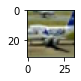

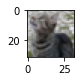

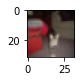

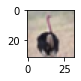

In [ ]:

for i in range(332,336):
    plt.subplot(120+ 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()
    

PREPROCESSING THE DATA 

In [ ]:


X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test=X_test/255
n_classes = 10


print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


BUILDING THE MODEL 

In [ ]:


from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten



model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model 
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 495s 1s/step - loss: 1.5613 - accuracy: 0.4250 - val_loss: 1.1366 - val_accuracy: 0.6053
Epoch 2/10
391/391 [==============================] - 508s 1s/step - loss: 1.0824 - accuracy: 0.6147 - val_loss: 0.9159 - val_accuracy: 0.6814
Epoch 3/10
391/391 [==============================] - 492s 1s/step - loss: 0.8986 - accuracy: 0.6856 - val_loss: 0.8137 - val_accuracy: 0.7200
Epoch 4/10
391/391 [==============================] - 496s 1s/step - loss: 0.7870 - accuracy: 0.7244 - val_loss: 0.7393 - val_accuracy: 0.7452
Epoch 5/10
391/391 [==============================] - 492s 1s/step - loss: 0.7054 - accuracy: 0.7526 - val_loss: 0.6904 - val_accuracy: 0.7580
Epoch 6/10
391/391 [==============================] - 513s 1s/step - loss: 0.6278 - accuracy: 0.7819 - val_loss: 0.6812 - val_accuracy: 0.7665
Epoch 7/10
391/391 [==============================] - 516s 1s/step - loss: 0.5747 - accuracy: 0.7968 - val_loss: 0.6617 - val_accuracy: 0.7753

PREDICTING 

In [ ]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 209ms/step


In [ ]:
print (predictions)

[[1.09556317e-03 1.32087851e-04 3.50367315e-02 1.57801360e-02
  3.15553874e-01 2.63291355e-02 9.68789740e-04 6.04404986e-01
  1.98933791e-04 4.99808113e-04]
 [3.20873398e-04 8.38576671e-05 1.17514029e-01 1.07182391e-01
  1.70315336e-02 3.57613206e-01 1.03223911e-02 3.88836175e-01
  2.51915335e-04 8.43599613e-04]
 [1.01084246e-04 2.07112331e-04 3.80393341e-02 1.28322784e-02
  8.61804758e-04 2.79198512e-02 9.19682384e-01 2.17622452e-04
  9.86136074e-05 4.00182544e-05]
 [9.69070607e-06 6.92612105e-07 1.45623619e-02 7.66414285e-01
  3.09786722e-02 2.93912049e-02 1.58484429e-01 1.42445191e-04
  3.30887133e-06 1.28593729e-05]
 [7.75390703e-08 9.99054611e-01 5.91558053e-12 9.85378703e-14
  3.61715086e-15 2.47163021e-13 1.30036742e-13 4.50675033e-13
  1.39014458e-06 9.43896594e-04]
 [6.74226257e-08 9.99858856e-01 2.42813236e-09 1.48479995e-09
  1.28916116e-12 3.05749592e-10 1.04726743e-08 4.41143910e-12
  3.29574432e-05 1.08091946e-04]
 [3.80040915e-03 6.52849965e-04 1.62771270e-01 2.87304848e

In [ ]:
for image in predictions:
    print(np.sum(image))

1.0000001
0.99999994
1.0000001
1.0
0.99999994
0.99999994
0.99999994
1.0
1.0


In [ ]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[7 7 6 3 1 1 6 6 8]


FINAL OBJECT DETECTION 

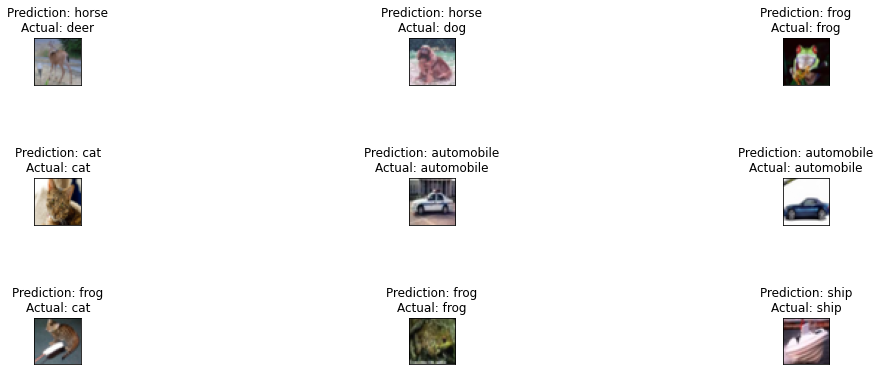

In [ ]:

fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 2)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()